In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)


2024-09-20 22:48:06.305694: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Neuron without activation - Regression/Linear model

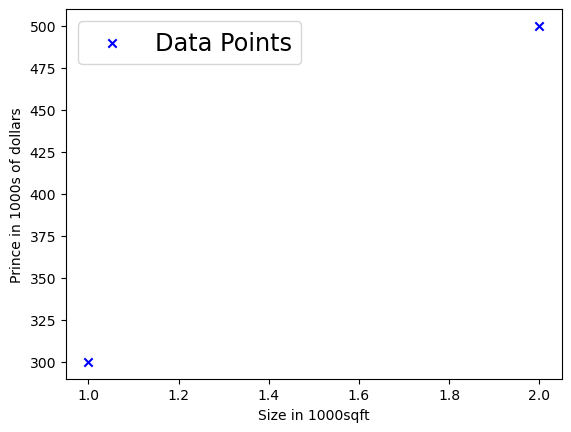

In [2]:
### Example of house pricing

X_train = np.array([[1.0], [2.0]], dtype=np.float32)           #(size in 1000 square feet)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)  


fig,ax = plt.subplots(1,1)
ax.scatter(X_train, Y_train, marker='x', c='b', label = 'Data Points')
ax.legend(fontsize='xx-large')
ax.set_ylabel("Prince in 1000s of dollars")
ax.set_xlabel("Size in 1000sqft")
plt.show()


### Linear Regression

A function implemented by a neuron with no activation is a linear regression

In [3]:
linear_layer = Dense(units=1, activation='linear',)

In [4]:
linear_layer.get_weights()

[]

In [5]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

tf.Tensor([[-1.3302]], shape=(1, 1), dtype=float32)


2024-09-20 22:48:11.744341: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
w,b = linear_layer.get_weights()
print(f"w = {w}, b={b}")

w = [[-1.3302]], b=[0.]


Initialize weights to random values

In [7]:
set_w = np.array([[200]])
set_b = np.array([100])

linear_layer.set_weights([set_w, set_b])

print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [8]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)
alin = np.dot(set_w, X_train[0].reshape(1,1))+set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


The two approachs below produces the same value

In [9]:
prediction_tf = linear_layer(X_train)
prediction_np = np.dot(X_train, set_w) + set_b


print(prediction_np, prediction_tf)
print(X_train, Y_train)


[[300.]
 [500.]] tf.Tensor(
[[300.]
 [500.]], shape=(2, 1), dtype=float32)
[[1.]
 [2.]] [[300.]
 [500.]]


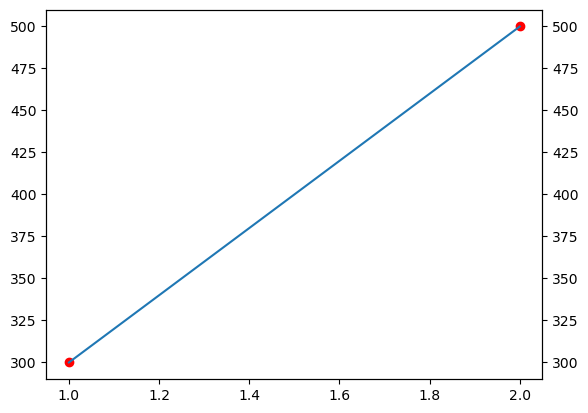

In [10]:
fig, ax2 = plt.subplots(1,1)

ax3 = ax2.twinx()
ax2.scatter(X_train, prediction_np, c='r') 
ax3.plot(X_train, Y_train)

plt.show()

### Neuron with sigmoid activation function

In [23]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
print(Y_train)

[[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]]


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

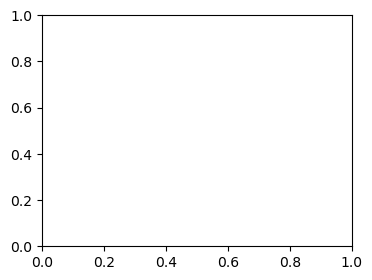

In [21]:
pos = Y_train ==1
neg = Y_train == 0

fig,ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='none', c = 'b',lw=3)

ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()


In [13]:
model = Sequential(
    [
        Dense(1,input_dim=1, activation='sigmoid',name='L1')
    ]
)

In [14]:
l_layer = model.get_layer('L1')
w,b = l_layer.get_weights()
print(w,b)
print(w.shape, b.shape)

[[-0.6888858]] [0.]
(1, 1) (1,)


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [16]:
set_w = np.array([[2]])
set_b = np.array([-4.5])

l_layer.set_weights([set_w, set_b])
print(l_layer.get_weights())


[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [17]:
a1 = model.predict(X_train[0].reshape(1,1))
print(a1)
alog = 1/(1+(np.exp(-(np.dot(set_w,X_train[0].reshape(1,1)) + set_b))))
print(alog)

1/1 [==============================] - 0s 94ms/step
[[0.01098694]]
[[0.01098694]]


In [18]:
w

array([[-0.6888858]], dtype=float32)